<a href="https://colab.research.google.com/github/AmoguJUduka/MachineLearning/blob/main/DeepLearningAssignments/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1b.

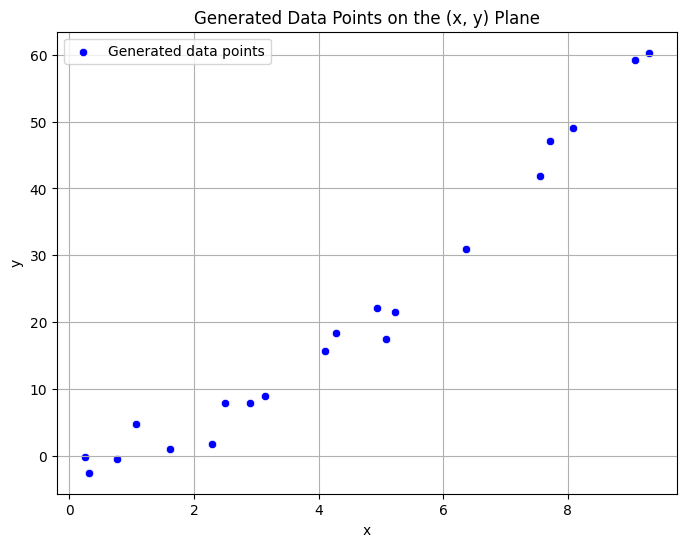

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Given values from the problem
theta_0 = -1
theta_1 = 2
theta_2 = 0.5
sigma = np.sqrt(10)  # Standard deviation of Gaussian noise
N = 20  # Number of data points

# Generate random x values between 0 and 10
x_values = np.random.uniform(0, 10, N)

# Generate y values according to the ground-truth model with added Gaussian noise
y_values = theta_0 + theta_1 * x_values + theta_2 * x_values**2 + np.random.normal(0, sigma, N)

# Plot the data points on the (x, y) plane
plt.figure(figsize=(8, 6))
#plt.scatter(x_values, y_values, color='blue', label='Generated data points')
sns.scatterplot(x=x_values, y=y_values, color='blue', label='Generated data points')
plt.title('Generated Data Points on the (x, y) Plane')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-3-8ce0b4310fd0>:30: RuntimeWarning: overflow encountered in matmul
  gradient = -2 * A_batch.T @ (y_batch - A_batch @ a) / len(idx)
<ipython-input-3-8ce0b4310fd0>:31: RuntimeWarning: invalid value encountered in subtract
  a -= learning_rate * gradient


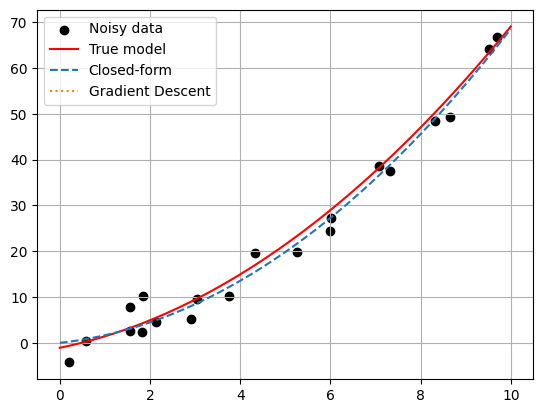

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta_0, theta_1, theta_2 = -1, 2, 0.5
sigma = np.sqrt(10)
N = 20

# Generate data
np.random.seed(42)
x = np.random.uniform(0, 10, N)
y = theta_0 + theta_1 * x + theta_2 * x**2 + np.random.normal(0, sigma, N)

# Design matrix for polynomial fitting
K = 2
A = np.vstack([x**k for k in range(K+1)]).T

# Closed-form solution
a_closed_form = np.linalg.inv(A.T @ A) @ (A.T @ y)

# Mini-batch gradient descent
def gradient_descent(A, y, learning_rate=0.01, epochs=1000):
    a = np.random.randn(A.shape[1])
    N = len(y)

    for epoch in range(epochs):
        idx = np.random.choice(N, size=10, replace=False)
        A_batch = A[idx]
        y_batch = y[idx]
        gradient = -2 * A_batch.T @ (y_batch - A_batch @ a) / len(idx)
        a -= learning_rate * gradient

    return a

a_gradient_descent = gradient_descent(A, y)

# Plot results
x_vals = np.linspace(0, 10, 100)
y_true = theta_0 + theta_1 * x_vals + theta_2 * x_vals**2
y_pred_closed_form = np.sum([a_closed_form[k] * x_vals**k for k in range(K+1)], axis=0)
y_pred_gd = np.sum([a_gradient_descent[k] * x_vals**k for k in range(K+1)], axis=0)

plt.scatter(x, y, color="black", label="Noisy data")
plt.plot(x_vals, y_true, label="True model", color="red")
plt.plot(x_vals, y_pred_closed_form, label="Closed-form", linestyle="--")
plt.plot(x_vals, y_pred_gd, label="Gradient Descent", linestyle=":")
plt.legend()
plt.grid()
plt.show()


<ipython-input-1-bc5df3d56b29>:25: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-1-bc5df3d56b29>:25: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-1-bc5df3d56b29>:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Results without normalization:
Training Accuracy: 0.5253
Test Accuracy: 0.5091


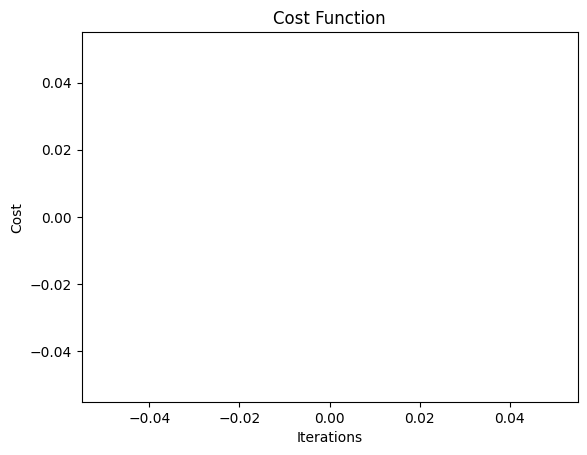

<ipython-input-1-bc5df3d56b29>:25: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-1-bc5df3d56b29>:25: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))



Results with normalization:
Training Accuracy: 0.9214
Test Accuracy: 0.9231


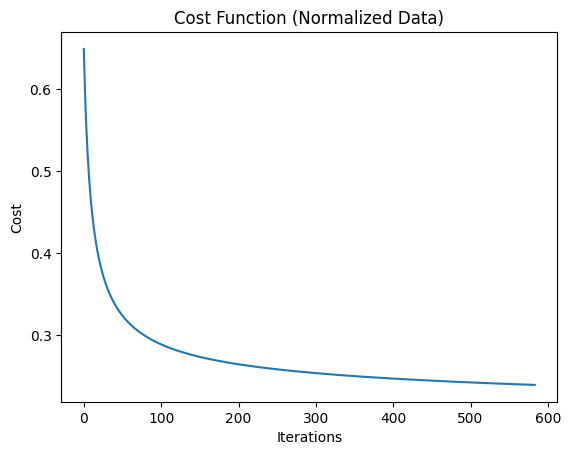

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Loading the Spambase dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_names = [f"feature_{i}" for i in range(57)] + ["target"]
data = pd.read_csv(url, names=column_names)

# Split the data into features (X) and target (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training (2/3) and test (1/3) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    costs = []

    for _ in range(num_iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * X.T @ (h - y)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)

    return theta, costs

def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5

def logistic_regression(X_train, y_train, X_test, y_test, learning_rate, num_iterations):
    # Add bias term
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

    # Initialize parameters
    theta = np.zeros(X_train.shape[1])

    # Train the model
    theta, costs = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

    # Make predictions
    y_pred_train = predict(X_train, theta)
    y_pred_test = predict(X_test, theta)

    # Calculate accuracy
    train_accuracy = np.mean(y_pred_train == y_train)
    test_accuracy = np.mean(y_pred_test == y_test)

    return theta, costs, train_accuracy, test_accuracy

# Run logistic regression without normalization
learning_rate = 0.1
num_iterations = 1000

theta, costs, train_accuracy, test_accuracy = logistic_regression(X_train, y_train, X_test, y_test, learning_rate, num_iterations)

print("Results without normalization:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the cost function
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

# Normalize the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Run logistic regression with normalized data
theta_norm, costs_norm, train_accuracy_norm, test_accuracy_norm = logistic_regression(X_train_normalized, y_train, X_test_normalized, y_test, learning_rate, num_iterations)

print("\nResults with normalization:")
print(f"Training Accuracy: {train_accuracy_norm:.4f}")
print(f"Test Accuracy: {test_accuracy_norm:.4f}")

# Plot the cost function for normalized data
plt.plot(costs_norm)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function (Normalized Data)')
plt.show()